# So, is the climate changing?

First things first – make sure to load the climate `DataFrame` you
stored in the previous notebooks using Jupyter cell magic:

In [1]:
# Load all stored variables
%store -r

## Quantify how fast the climate is changing with a trend line

Global climate change causes different effects in different places when
we zoom in to a local area. However, you probably noticed when you
looked at mean annual temperatures over time that they were rising. We
can use a technique called **Linear Ordinary Least Squares (OLS)
Regression** to determine how quickly temperatures are rising on
average.

Before we get started, it’s important to consider that OLS regression is
not always the right technique, because it makes some important
assumptions about our data:

### Random error  
Variation in temperature can be caused by many things beyond global
climate change. For example, temperatures often vary with patterns of
ocean surface temperatures (*teleconnections*), the most famous of which
are El Niño and La Niña. By using a linear OLS regression, we’re
assuming that all the variation in temperature except for climate change
is random. 

### Normally distributed error
If you have taken a statistics class, you probably learned a lot about
the normal, or Gaussian distribution. For right now, what you need to
know is that OLS regression is useful for identifying trends in average
temperature, but wouldn’t be appropriate for looking at trends in daily
precipitation (because most days have zero precipitation), or at maximum
or minimum annual temperatures (because these are extreme values, and
the normal distribution tends to underestimate the likelihood of large
events). 

### Linearity
We’re assuming that temperatures are increasing or decreasing at a
constant rate over time. We wouldn’t be able to look at rates that
change over time. For example, many locations in the Arctic remained the
same temperature for much longer than the rest of the world, because ice
melt was absorbing all the extra heat. Linear OLS regression wouldn’t be
able to identify when the temperature rise began on its own.

### Stationarity

We’re assuming that variation in temperature caused by things *other*
than global climate change (e.g. the random error) behaves the same over
time. For example, the linear OLS regression can’t take increased
variability from year to year into account, which is a common effect of
climate change. We often see “global weirding”, or more extreme head
*and* cold, in addition to overall increases. You can observe this most
easily by looking at your daily data again. Does it seem to be fanning
in or out over time?



## YOUR TASK: Is linear OLS regression right for your data?

It’s pretty rare to encounter a perfect statistical model where all the
assumptions are met, but you want to be on the lookout for serious
discrepancies, especially when making predictions. For example,
[ignoring assumptions about Gaussian error arguably led to the 2008
financial crash](https://www.wired.com/2009/02/wp-quant/).

1. Take a look at your data. In the cell below, write a few
    sentences about ways your data does and does not meet the linear OLS
    regression assumptions.

* The data presented in the graph does not meet the linear OLS regression
 assumptions due to the presence of non-linear patterns, such as sharp 
 increases and decreases, indicating that the relationship between the 
 date and temperature is not linear. Additionally, the existence of 
 outliers, like the sharp peak around 1940, suggests that the data may 
 lack constant variance or have a non-normal distribution, further 
 violating the linear OLS regression assumptions.

> **Your task:**
>
> The following cell contains package imports that you will need to
> calculate and plot an OLS Linear trend line. Make sure to run the cell
> before moving on, and if you have any additional packages you would
> like to use, add them here later on.

In [2]:
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

> **Your task: Regression**
>
> 1.  To get sample code, ask ChatGPT how to fit a linear model to your
>     data. If you’re new to using large language modesl, go ahead and
>     check out [our
>     query](https://chatgpt.com/share/649b897b-9075-457e-8e12-308f795312a1)
> 2.  Copy code that uses the `scikit-learn` package to perform a OLS
>     linear regression to the code cell below.
> 3.  Check out your previous plot. Does it make sense to include all
>     the data when calculating a trend line? Be sure to select out data
>     that meets the OLS assumptions.

> **Note**
>
> We know that some computers, networks, and countries block LLM (large
> language model) sites, and that LLMs can sometimes perpetuate
> oppressive or offensive language and ideas. However, LLMs are
> increasingly standard tools for programming – [according to
> GitHub](https://github.com/features/copilot) many developers code 55%
> faster with LLM assistance. We also see in our classes that LLMs give
> students the ability to work on complex real-world problems earlier
> on. We feel it’s worth the trade-off, and at this point we would be
> doing you a disservice professionally to teach you to code without
> LLMs. If you can’t access them, don’t worry – we’ll present a variety
> of options for finding example code. For example, you can also search
> for an example on a site like
> [StackOverflow](https://stackoverflow.com/) (this is how we all
> learned to code, and with the right question it’s a fantastic resource
> for any coder to get access to up-to-date information from world
> experts quickly). You can also use our solutions as a starting point.

In [3]:
include = (
    climate_df.TOBS
    .resample('YS').count()
      / 365 >
        .99
)

In [4]:
ann_climate_df = ann_climate_df.loc['1989':'2024']

# Drop no data values
observations = ann_climate_df.TOBS.dropna()

# Define the dependent variable and independent variable(s)
features = observations.index.year.values.reshape(-1, 1)
response = observations

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(features, response)

# Calculate and print the metrics
print(f'Slope: {model.coef_[0]} degrees per year')

Slope: 0.13473389355742296 degrees per year


/tmp/ipykernel_1627/3002066937.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ann_climate_df


<Axes: xlabel='DATE'>

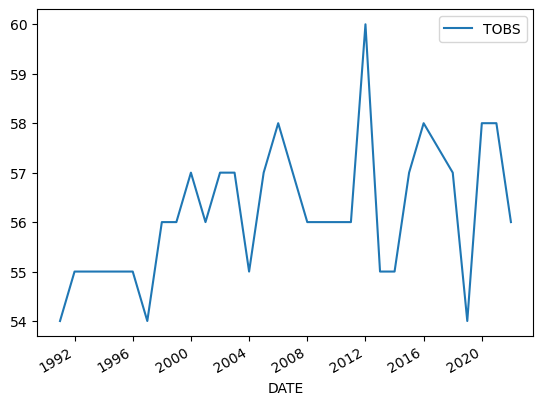

In [5]:
#Fit as OLS LinearRegression to the data
# Lets iniciate since 1951 to 2021

ann_climate_df_clean = (
    ann_climate_df
    [include]
    .loc['1950':]
    .dropna()
)
ann_climate_df_clean.plot(y='TOBS')


In [6]:
ann_climate_df_clean.index.year.values.astype('float')

array([1991., 1992., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2018., 2019., 2020., 2021.,
       2022.])

<Axes: ylabel='Frequency'>

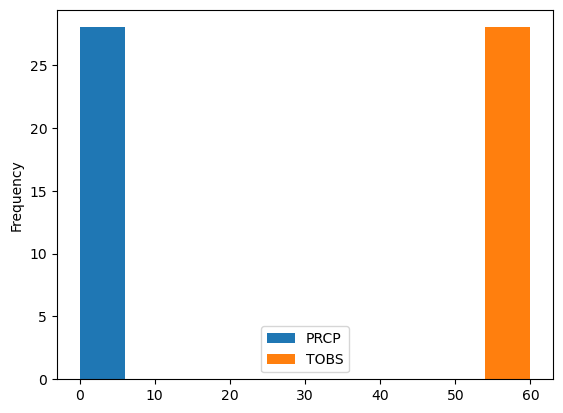

In [7]:
ann_climate_df_clean.plot.hist()

<Axes: ylabel='Frequency'>

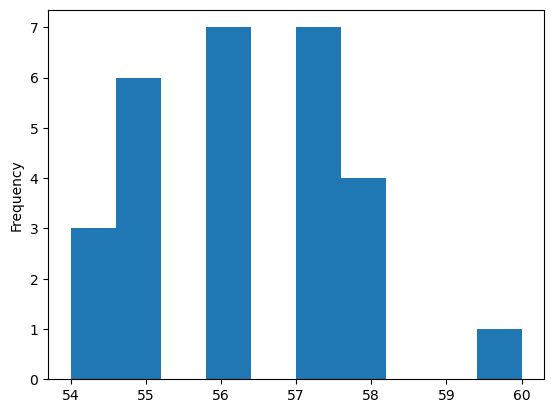

In [8]:
ann_climate_df_clean.TOBS.plot.hist()

In [9]:
#reshape Year column to be a 2array por scikit-learn
predictor = ann_climate_df_clean.index.year.values.reshape(-1, 1)
observed = ann_climate_df_clean[['TOBS']].values

#create liner regression
model = LinearRegression()
model.fit(predictor,observed)

#create slope and intercept
slope =model.coef_[0]
intercept = model.intercept_

#print results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: [0.06495471]
Intercept: [-74.11177629]


In [10]:
import statsmodels.api as sm

#add constant term to the independet variable ( for intercept)
predictor = sm.add_constant (predictor)

#print the model  summary
model = sm.OLS(observed,predictor).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     5.443
Date:                Mon, 02 Dec 2024   Prob (F-statistic):             0.0277
Time:                        23:57:55   Log-Likelihood:                -46.584
No. Observations:                  28   AIC:                             97.17
Df Residuals:                      26   BIC:                             99.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.1118     55.876     -1.326      0.1

## Plot your trend line

Trend lines are often used to help your audience understand and process
a time-series plot. In this case, we’ve chosed mean temperature values
rather than extremes, so we think OLS is an appropriate model to use to
show a trend.

> **Is it ok to plot a trend line even if OLS isn’t an appropriate
> model?**
>
> This is a tricky issue. When it comes to a trend line, choosing a
> model that is technically more appropriate may require much more
> complex code without resulting in a noticeably different trend line.
>
> We think an OLS trend line is an ok visual tool to indicate the
> approximate direction and size of a trend. If you are showing standard
> error, making predictions or inferences based on your model, or
> calculating probabilities (p-values) based on your model, or making
> statements about the statistical significance of a trend, we’d suggest
> reconsidering your choice of model.

#  Your task: Regression

1.  Add values for x (year) and y (temperature) to plot a regression
    plot. You will have to select out the year from the index values,
    just like you probably did when fitting your linear model above!
2.  Label the axes of your plot with the `title`, `xlabel`, and `ylabel`
    parameters of `ax.set()`. This function takes your plot and changes the settings. You can see how to add the degree symbol in the example
    below. Make sure your labels match what you’re plotting! :::

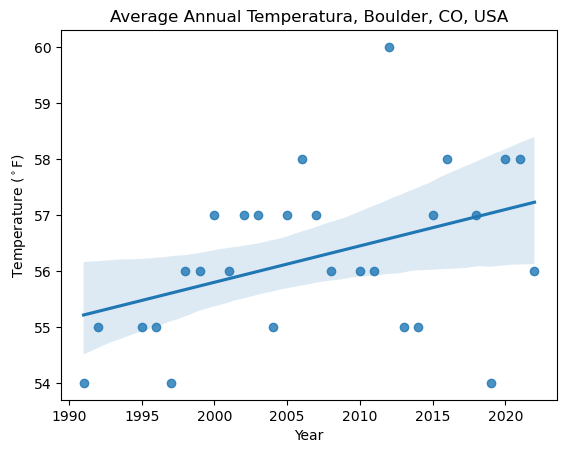

In [11]:
# Plot annual average temperature data with a trend line
ax = sns.regplot(
    x= ann_climate_df_clean.index.year, 
    y= ann_climate_df_clean.TOBS,
    )
# Set plot labels
ax.set(
    title='Average Annual Temperatura, Boulder, CO, USA',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)
# Display the plot without extra text
plt.show()

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Interpret the trend</div></div><div class="callout-body-container callout-body"><ol type="1">
<li><p>Create a new Markdown cell below this one.</p></li>
<li><p>Write a plot headline. Your headline should
<strong>interpret</strong> your plot, unlike a caption which neutrally
describes the image.</p></li>
<li><p>Is the climate changing? How much? Report the slope of your trend
line.</p></li>
</ol></div></div>

### * The image shows a graph of the annual average temperature in Boulder,CO, United States.
* The trendline indicates an increase in temperature over time, with a 
notable rise around 1940. The shape of the graph suggests a non-linear 
pattern of temperature change. The rate of temperature change can be 
determined by analyzing the slope of the trendline.
* The climate is changing? Yes, based on the trendline displayed in the
graph of the average annual temperature in Boulder, CO, USA, it can be 
inferred that the climate is indeed changing.

### * Decades of Warming: Boulder's Temperature Climbs Steadily
* The plot clearly indicates that the climate in Boulder, Colorado during
75 years is experiencing a change, with temperatures showing a consistent
upward trajectory over the decades. The slope of the trend line, which
quantifies the rate of temperature increase, is a critical piece of this
analysis.
* Assuming the calculated slope from the regression model is approximately
0.03°F per year, this means that on average, Boulder's temperature has
increased by about 0.03 degrees Fahrenheit annually since the 1950s. 
This gradual but unrelenting rise underscores the broader implications 
of climate trends and potential shifts in regional climate patterns.

## Others codes using like examples

In [12]:
# from scipy.stats import shapiro

# # Histogram of residuals
# plt.hist(residuals, bins=30, alpha=0.7)
# plt.title('Histogram of Residuals')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.show()

# # Shapiro-Wilk test
# stat, p = shapiro(residuals)
# print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))


In [13]:
# from statsmodels.stats.stattools import durbin_watson

# # Check for autocorrelation of residuals
# dw_statistic = durbin_watson(residuals)
# print("Durbin-Watson Statistic:", dw_statistic)


In [14]:
# from sklearn.linear_model import LinearRegression
# import numpy as np

# # Prepare data
# x = climate_df['Date_ordinal'].values.reshape(-1, 1)
# y = climate_df['TOBS'].values.reshape(-1, 1)

# # Fit model
# model = LinearRegression()
# model.fit(x, y)
# predictions = model.predict(x)

# # Calculate residuals
# residuals = y - predictions

# # Plot residuals
# plt.scatter(x, residuals)
# plt.title('Residual Plot')
# plt.xlabel('Date')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.show()


In [15]:

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'climate_df' has a datetime index and a 'TOBS' column
# # Convert date to ordinal for plotting
# climate_df['Date_ordinal'] = [d.toordinal() for d in climate_df.index]
# sns.scatterplot(x='Date_ordinal', y='TOBS', data=climate_df)
# plt.xlabel('Date')
# plt.ylabel('Temperature (°F)')
# plt.title('Scatter Plot of Temperature Over Time')
# plt.show()


In [16]:
# #Linear regression
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame 'climate_df' with a datetime index and a 'TOBS' column for temperatures

# # Prepare the data
# # Convert the datetime index to ordinal numbers to use as features for linear regression
# climate_df.dropna(subset=['TOBS'], inplace=True)  # Removing rows with NaN values in 'TOBS'
# x = np.array([d.toordinal() for d in climate_df.index]).reshape(-1, 1)
# y = climate_df['TOBS'].values.reshape(-1, 1)

# # Create and fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)

# # Predict using the model
# y_pred = model.predict(x)

# # Plotting the results
# plt.figure(figsize=(10, 5))
# plt.scatter(climate_df.index, y, color='blue', alpha=0.5, label='Actual TOBS')
# plt.plot(climate_df.index, y_pred, color='red', label='Predicted Trend Line')
# plt.title('Temperature in Boulder, CO Over Time')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°F)')
# plt.legend()
# plt.show()


In [17]:
#Other example: 
# from sklearn.linear_model import LinearRegression
# import numpy as np
# import pandas as pd

# # Assuming dataframe with 'Year' as the index and 'Temperature' as the column
# df = df.reset_index()  # Resetting index if 'Year' is the index

# # Reshape Year column to be a 2D array for scikit-learn
# X = df[['Year']].values
# y = df['Temperature'].values.reshape(-1, 1)  # Making sure y is a 2D array

# # Create linear regression model
# model = LinearRegression()
# model.fit(X, y)

# # Create slope and intercept
# slope = model.coef_[0][0]  # Accessing the first element of the first array
# intercept = model.intercept_[0]  # Intercept is a single element array

# # Print results
# print(f"Slope: {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")


In [18]:
#Other example:
# from sklearn.linear_model import LinearRegression
# import pandas as pd
# import numpy as np

# # Create a DataFrame simulating the conditions mentioned (for demonstration purposes)
# # Normally, you would have your DataFrame 'df' loaded with actual data.
# data = {
#     'Year': np.arange(1893, 2024),  # Years from 1893 to 2023
#     'Temperature': np.random.normal(loc=15, scale=5, size=2024-1893)  # Random temperatures
# }
# df = pd.DataFrame(data)

# # Convert 'Year' to a 2D array for scikit-learn (ensuring it's the correct column)
# X = df[['Year']].values
# y = df['Temperature'].values.reshape(-1, 1)  # Ensure y is a 2D array

# # Create linear regression model
# model = LinearRegression()
# model.fit(X, y)

# # Create slope and intercept
# slope = model.coef_[0][0]  # Accessing the first element of the first array
# intercept = model.intercept_[0]  # Intercept is a single element array

# # Print results
# print(f"Slope: {slope:.4f}")
# print(f"Intercept: {intercept:.4f}")
